# Investing On ETFs Using The Kelly Formula Part 1

## How To Retrieve ETF Data Using Python 

## Introduction
The main problem of an investor is identifying profitable trading strategies.
To solve this, he uses fundamental and quantitative techniques to pick winning trading systems.
The next problem concerning the investor is how to optimally allocate his capital to different winning strategies.
A solution is to use the Kelly formula to calculate the amount of capital he will deploy to securities or trading systems before him.

In this article, I will source Vanguard ETFs list from the their website using Python package Selenium. 
I will use the list to pull historical Open-High-Low-Close-Volume (OHCLV) data using Python package pandas-datareader.
The ETF data collected in this article will be used in the next article to present a solution to the investor's capital allocation problem using the Kelly formula.

## Exchange Traded Fund (ETF)
ETFs are traded on major stock exchanges like the New York Stock Exchange and Nasdaq.
You can buy and sell them using online brokers such as TD Ameritrade or Interactive Brokers.
An ETF is a composed of tens, hundreds or sometimes even thousands of stocks (or bonds) in a single fund.

They have grown in popularity due to the following:
1. Low costs: ETFs have an average expense ratio of 0.27% per year.
2. Diversification: They provide a diversified basket of stocks instead of buying a single stock.
3. Alternative themes: ETFs enable investors to gain exposure into niche industries like water and solar tech firms.

## Vanguard
In this article, I will be using ETFs managed by Vanguard and present a brief overview of the firm.
It was established in 1975, and offers both actively and passively managed funds. 
Vanguard's founder is Jack Bogle, the father of index investing.
As of January 2019, it has USD 5.2 trillion of AUM.

## Vanguard ETFs
Vanguard ETFs are grouped by:
1. US Bond ETFs 
2. US Stock ETFs 
3. International Bond ETFs
4. International Stock ETFs
5. Sector ETFs

## Step By Step
1. Source Vanguard ETFs list of tickers.
2. Source Vanguard ETFs historical OHLCV data.

You can find the code on https://github.com/DinodC/investing-etf-kelly.

## Source Vanguard ETFs List Of Tickers
In this section, we retrieve tickers of every ETF on Vanguard's website.
We use Selenium, a web browser automation tool, to help us retrieve the ETF tickers.
We propose two approaches, direct and indirect, of sourcing ETF ticker data from website.

### Selenium
Selenium automates web browsers.
Selenium was conceived for automation of web application testing.
It allows you to open a browser and automate actions like clicking buttons and completing forms.

I propose two ways of using Selenium scrape of ETF ticker data:
1. An automated approach: We automate navigation of Vanguard's web site by going from the home page to the ETF list page containing the tickers.
2. A non-automated approach: We go directly to the ETF list page containing the tickers.

Import packages

In [1]:
import pandas as pd
from pandas import Series, DataFrame
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
import pandas_datareader as web
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

### Automated Approrach
Code for scraping ETF tickers from Vanguard's home page using the first approach

In [2]:
# # Option
# option = webdriver.ChromeOptions()
# option.add_argument('--incognito')

# # Create a Chrome webdriver 
# driver = webdriver.Chrome('/Applications/chromedriver', options=option)

# # Get to the Vanguard home page
# driver.get('https://investor.vanguard.com/home/')

# # Set delay in seconds
# delay = 10 

# # Head to the next page by clicking on 'Investing'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Investing')))
#     driver.find_element_by_link_text('Investing').click()
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# # Head to the next page by clicking on 'Vanguard ETFs'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Vanguard ETFs')))
#     driver.find_element_by_link_text('Vanguard ETFs').click()
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# # Head to the next page by clicking on 'Browse a list of Vanguard ETFs'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Browse a list of Vanguard ETFs')))
#     driver.find_element_by_partial_link_text('Browse a list of Vanguard ETFs').click()
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# # Source the Vanguard ETF names and tickers
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'productEntry')))
#     content = driver.find_elements_by_class_name('productEntry')
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

### Non-automated Approach
Code for scraping ETF tickers from Vanguard's ETF list page using the second approach

In [3]:
# Option
option = webdriver.ChromeOptions()
option.add_argument('--incognito')

# Create a Chrome webdriver 
driver = webdriver.Chrome('/Applications/chromedriver', options=option)

# Get to the Vanguard ETF list page
driver.get('https://investor.vanguard.com/etf/list#/etf/asset-class/month-end-returns')

# Set delay in seconds
delay = 10

try:
    WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'productEntry')))
    # Source the Vanguard ETF names and tickers
    content = driver.find_elements_by_class_name('productEntry')
except TimeoutException:
    print("Timed out waiting for page to load.")
    driver.quit()

### Vanguard ETFs

Inspect the content collected

In [4]:
len(content)

118

In [5]:
for i in content:
    print(i.text)

Extended Duration Treasury ETF
Vanguard Select Funds
Intermediate-Term Bond ETF
Intermediate-Term Treasury ETF
Vanguard Select Funds
Long-Term Bond ETF
Long-Term Treasury ETF
Mortgage-Backed Securities ETF
Vanguard Select Funds
Short-Term Bond ETF
Vanguard Select Funds
Short-Term Inflation-Protected Securities ETF
Short-Term Treasury ETF
Vanguard Select Funds
Total Bond Market ETF
Intermediate-Term Corporate Bond ETF
Long-Term Corporate Bond ETF
Short-Term Corporate Bond ETF
Total Corporate Bond ETF
Vanguard Select Funds
Tax-Exempt Bond ETF
Dividend Appreciation ETF
ESG U.S. Stock ETF
Growth ETF
High Dividend Yield ETF
Large-Cap ETF
Mega Cap ETF
Mega Cap Growth ETF
Mega Cap Value ETF
Vanguard Select Funds
S&P 500 ETF
Vanguard Select Funds
Total Stock Market ETF
Value ETF
Vanguard Select Funds
Extended Market ETF
Mid-Cap ETF
Mid-Cap Growth ETF
Mid-Cap Value ETF
Small-Cap ETF
Small-Cap Growth ETF
Small-Cap Value ETF
Total World Bond ETF
Vanguard Select Funds
Total International Bond ETF


VPU Stock - Sector 0.10% $134.60 -$0.55
decreased
-0.40%
decreased
3.21%B
30 day
5/31/2019 15.09% 17.11% 10.36% 12.69% 10.07% (01/26/2004)


We notice the following structure:
1. Elements 0-58 are the names of the ETFs.
2. Elements 59-118 are the tickers, asset class, etc. of the ETFs.

Create lists to hold ETF names and tickers

In [6]:
# Initialize the lists
etf_names = []
etf_tickers = []

for i in range(0, 59):
    # Get the names
    try:
        etf_names.append(content[i].text.split('\n')[1])
    except IndexError:
        etf_names.append(content[i].text)
    
    # Get the tickers
    etf_tickers.append(content[i + 59].text.split()[0])

Create a DataFrame mapping an ETF's name to it's ticker

In [7]:
etf_map = pd.DataFrame({'Name': etf_names,
                        'Ticker': etf_tickers})

### Vanguard ETFs By Group
Create a DataFrame mapping an ETF's name to it's ticker by group.

In [8]:
etf_us_bonds_map = etf_map.iloc[0:15]
etf_us_stocks_map = etf_map.iloc[15:33]
etf_intl_bonds_map = etf_map.iloc[33:36]
etf_intl_stocks_map = etf_map.iloc[36:48]
etf_sectors_map = etf_map.iloc[48:]

## Source Vanguard ETFs Historical OHLCV Data

Set the parameters
1. Source is set to the Investors Exchange.
2. Start and end date are set to span 5 years from today.

In [9]:
source = 'iex'
start = '2014-01-01'
end = '2020-01-01'

### Vanguard ETFs

Pull historical OHLCV data from the Investors Exchange

In [49]:
# List of tickers
etf_list = etf_map['Ticker'].tolist()

# Initialize data
etf_data = web.DataReader(etf_list[0], source, start, end)
# Conver index to datetime
etf_data.index = pd.to_datetime(etf_data.index)

for i in range(1, len(etf_list)):
    # Pull new data
    temp_data = web.DataReader(etf_list[i], source, start, end)
    
    # Update data
    etf_data = pd.concat([etf_data, temp_data], axis=1, sort=True)
    
# Set multi-level columns
etf_data.columns = pd.MultiIndex.from_product([etf_list, temp_data.columns])

Inspect

In [50]:
etf_data.head()

EDV                                        BIV           \
               open     high      low    close volume     open     high   
date                                                                      
2014-06-12  85.2790  86.4896  84.7732  86.2077  34454  72.1485  72.3372   
2014-06-13  85.6853  86.9375  85.6853  86.2824  36060  72.0456  72.2427   
2014-06-16  86.4233  86.7762  86.0253  86.5809  72137  72.2428  72.2600   
2014-06-17  86.3404  86.3404  85.5029  85.7336  55781  72.1313  72.1313   
2014-06-18  85.9258  86.6058  85.6771  86.3902  15027  72.0884  72.2857   

                                       ...         VNQ                    \
                low    close  volume   ...        open     high      low   
date                                   ...                                 
2014-06-12  72.0884  72.3372  325751   ...     60.0805  60.1289  59.4764   
2014-06-13  72.0371  72.1999  156542   ...     59.9351  60.1855  59.5394   
2014-06-16  72.1571  72.2257  390893   ...     60.0401  60.2920  59.6929   
2014-06-17  71.9426  71.9426  306016   ...     59.7413  59.9997  59.5171   
2014-06-18  71.9855  72.2857  300049   ...     59.9432  60.4883  59.6929   

                                  VPU                                      
              close   volume     open     high      low    close   volume  
date                                                                       
2014-06-12  59.9351  2249588  78.0776  78.5698  77.2797  78.4256    96214  
2014-06-13  60.0885  1853138  78.2643  78.9518  78.0521  78.8499    99422  
2014-06-16  59.7817  2643862  78.9348  79.9788  78.7803  79.4101  1006261  
2014-06-17  59.9351  1942368  79.3168  79.5544  78.9857  79.3592   265682  
2014-06-18  60.3550  2734503  79.3507  80.9549  79.3507  80.9549   151926  

[5 rows x 295 columns]

In [51]:
etf_data.EDV.head()

,open,high,low,close,volume
date,,,,,
2014-06-12,85.2790,86.4896,84.7732,86.2077,34454
2014-06-13,85.6853,86.9375,85.6853,86.2824,36060
2014-06-16,86.4233,86.7762,86.0253,86.5809,72137
2014-06-17,86.3404,86.3404,85.5029,85.7336,55781
2014-06-18,85.9258,86.6058,85.6771,86.3902,15027


In [52]:
etf_data.tail()

EDV                                        BIV                  \
              open      high       low   close  volume   open    high     low   
date                                                                            
2019-06-05  125.13  125.5000  124.4900  124.60  301695  85.51  85.640  85.380   
2019-06-06  125.85  126.5848  124.8075  125.26  137576  85.46  85.535  85.320   
2019-06-07  126.65  126.9993  126.1300  126.56   88292  85.76  85.830  85.595   
2019-06-10  125.42  125.4200  124.8400  125.20  153210  85.51  85.550  85.390   
2019-06-11  125.12  125.8000  125.0900  125.48  187176  85.37  85.430  85.330   

                            ...       VNQ                                 \
            close  volume   ...      open    high    low  close   volume   
date                        ...                                            
2019-06-05  85.47  606893   ...     87.21  88.620  86.99  88.52  6775425   
2019-06-06  85.40  572499   ...     88.80  88.890  88.05  88.69  4077190   
2019-06-07  85.68  381772   ...     89.13  89.569  88.92  89.02  3525699   
2019-06-10  85.40  350319   ...     89.19  89.290  88.40  88.73  2945455   
2019-06-11  85.39  471072   ...     88.99  89.190  88.31  88.97  3834010   

               VPU                                       
              open      high       low   close   volume  
date                                                     
2019-06-05  131.67  134.1402  131.2348  133.75   243189  
2019-06-06  133.91  134.7300  133.6399  134.52  1183343  
2019-06-07  135.29  135.9600  133.6300  133.66   235898  
2019-06-10  133.33  133.4100  132.1900  132.80   237848  
2019-06-11  132.80  132.9950  131.2100  131.97   105742  

[5 rows x 295 columns]

In [53]:
etf_data.EDV.tail()

,open,high,low,close,volume
date,,,,,
2019-06-05,125.13,125.5000,124.4900,124.60,301695
2019-06-06,125.85,126.5848,124.8075,125.26,137576
2019-06-07,126.65,126.9993,126.1300,126.56,88292
2019-06-10,125.42,125.4200,124.8400,125.20,153210
2019-06-11,125.12,125.8000,125.0900,125.48,187176


### Vanguard ETFs By Group

Create DataFrame objects containing close prices of ETFs by group.

In [54]:
# Create list of Vanguard ETF groups
groups = ['us bonds',
          'us stocks',
          'intl bonds',
          'intl stocks',
          'sectors']

# Create a dictionary of Vanguard ETF maps
maps = {'us bonds': etf_us_bonds_map,
        'us stocks': etf_us_stocks_map,
        'intl bonds': etf_intl_bonds_map,
        'intl stocks': etf_intl_stocks_map,
        'sectors': etf_sectors_map}

# Initialize Vanguard ETF close dictionary
close = {'us bonds': pd.DataFrame(),
         'us stocks': pd.DataFrame(),
         'intl bonds': pd.DataFrame(),
         'intl stocks': pd.DataFrame(),
         'sectors': pd.DataFrame()}

# Update Vanguard ETF close dictionary
for i in groups:
    # Set tickers
    tickers = maps[i]['Ticker'].tolist()
     
    res = {}
    for j in range(len(tickers)):
        res[tickers[j]] = etf_data[tickers[j]].close
        
    # Update close prices 
    close[i] = pd.DataFrame(res)

### Vanguard US Bond ETFs

In [55]:
etf_us_bonds_close = close['us bonds']

Inspect

In [56]:
etf_us_bonds_close.head()

,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,VCIT,VCLT,VCSH,VTC,VTEB
date,,,,,,,,,,,,,,,
2014-06-12,86.2077,72.3372,58.3027,72.9509,61.2526,46.7804,73.7095,47.2736,57.5397,71.6522,72.7439,71.9479,71.7766,NaN,NaN
2014-06-13,86.2824,72.1999,58.2387,72.9960,61.3021,46.7268,73.6636,47.2263,57.5113,71.6347,72.6340,71.9076,71.7676,NaN,NaN
2014-06-16,86.5809,72.2257,58.1847,73.0862,61.3876,46.7358,73.6360,47.2168,57.4925,71.6172,72.6847,71.9882,71.6871,NaN,NaN
2014-06-17,85.7336,71.9426,58.0467,72.6678,61.0080,46.6733,73.5809,47.2168,57.4641,71.4508,72.3635,71.6739,71.6692,NaN,NaN
2014-06-18,86.3902,72.2857,58.2103,73.0698,61.2963,46.8250,73.6452,47.3493,57.5019,71.6347,72.7439,72.0849,71.7766,NaN,NaN


In [57]:
etf_us_bonds_close[['EDV', 'BIV', 'VGIT', 'BLV', 'VGLT']].head()

,EDV,BIV,VGIT,BLV,VGLT
date,,,,,
2014-06-12,86.2077,72.3372,58.3027,72.9509,61.2526
2014-06-13,86.2824,72.1999,58.2387,72.9960,61.3021
2014-06-16,86.5809,72.2257,58.1847,73.0862,61.3876
2014-06-17,85.7336,71.9426,58.0467,72.6678,61.0080
2014-06-18,86.3902,72.2857,58.2103,73.0698,61.2963


In [58]:
etf_us_bonds_close.tail()

,EDV,BIV,VGIT,BLV,VGLT,VMBS,BSV,VTIP,VGSH,BND,VCIT,VCLT,VCSH,VTC,VTEB
date,,,,,,,,,,,,,,,
2019-06-05,124.60,85.47,65.50,94.15,80.02,52.52,80.21,49.30,60.77,82.14,88.14,92.77,80.13,NaN,NaN
2019-06-06,125.26,85.40,65.44,94.50,80.27,52.53,80.12,49.28,60.72,82.12,88.13,93.04,80.09,NaN,NaN
2019-06-07,126.56,85.68,65.61,95.18,80.92,52.62,80.23,49.37,60.78,82.34,88.46,93.78,80.20,NaN,NaN
2019-06-10,125.20,85.40,65.40,94.63,80.20,52.54,80.13,49.26,60.72,82.17,88.21,93.50,80.14,NaN,NaN
2019-06-11,125.48,85.39,65.36,94.57,80.29,52.51,80.11,49.22,60.68,82.11,88.21,93.53,80.10,NaN,NaN


In [59]:
etf_us_bonds_close[['EDV', 'BIV', 'VGIT', 'BLV', 'VGLT']].tail()

,EDV,BIV,VGIT,BLV,VGLT
date,,,,,
2019-06-05,124.60,85.47,65.50,94.15,80.02
2019-06-06,125.26,85.40,65.44,94.50,80.27
2019-06-07,126.56,85.68,65.61,95.18,80.92
2019-06-10,125.20,85.40,65.40,94.63,80.20
2019-06-11,125.48,85.39,65.36,94.57,80.29


VTC and VTEB close prices are NaNs, we drop these funds.

In [60]:
etf_us_bonds_close.drop(['VTC', 'VTEB'], axis='columns', inplace=True)

### Vanguard US Stock ETFs

In [61]:
etf_us_stocks_close = close['us stocks']

Inspect

In [62]:
etf_us_stocks_close.head()

,VIG,ESGV,VUG,VYM,VV,MGC,MGK,MGV,VOO,VTI,VTV,VXF,VO,VOT,VOE,VB,VBK,VBR
date,,,,,,,,,,,,,,,,,,
2014-06-12,69.5502,NaN,91.2609,56.2715,80.5827,59.7627,70.6379,50.7774,160.3744,91.0774,70.6714,79.4990,107.5091,90.5219,76.4035,105.3637,117.2411,93.1253
2014-06-13,69.6492,NaN,91.4579,56.5027,80.8184,59.9253,70.7875,51.0587,160.8808,91.3771,70.9886,79.7502,107.9332,90.7654,76.7002,105.7062,117.6700,93.3694
2014-06-16,69.6852,NaN,91.5235,56.6654,80.9272,60.0065,70.8623,51.0499,161.0164,91.4498,71.0591,79.8898,108.0167,90.8770,76.7722,105.9931,118.2894,93.4056
2014-06-17,69.8382,NaN,91.7017,56.7596,81.1175,60.1510,70.9464,51.2082,161.4414,91.7767,71.2706,80.5038,108.4983,91.2417,77.1947,106.7613,119.2423,94.1741
2014-06-18,70.5041,NaN,92.4053,57.1450,81.7520,60.6205,71.5070,51.6566,162.6440,92.4578,71.8258,80.9318,109.1837,91.7695,77.6892,107.4184,119.9952,94.6171


In [63]:
etf_us_stocks_close[['VIG', 'ESGV', 'VUG', 'VYM', 'VV']].head()

,VIG,ESGV,VUG,VYM,VV
date,,,,,
2014-06-12,69.5502,NaN,91.2609,56.2715,80.5827
2014-06-13,69.6492,NaN,91.4579,56.5027,80.8184
2014-06-16,69.6852,NaN,91.5235,56.6654,80.9272
2014-06-17,69.8382,NaN,91.7017,56.7596,81.1175
2014-06-18,70.5041,NaN,92.4053,57.1450,81.7520


In [64]:
etf_us_stocks_close.tail()

,VIG,ESGV,VUG,VYM,VV,MGC,MGK,MGV,VOO,VTI,VTV,VXF,VO,VOT,VOE,VB,VBK,VBR
date,,,,,,,,,,,,,,,,,,
2019-06-05,112.07,NaN,156.30,85.44,129.98,97.6700,123.66,78.47,259.85,144.66,107.96,114.62,161.93,144.68,108.01,151.40,178.53,127.16
2019-06-06,112.72,NaN,157.51,86.00,130.77,98.3100,124.52,78.90,261.54,145.47,108.63,114.78,162.81,145.49,108.60,151.57,178.89,127.16
2019-06-07,113.85,NaN,159.85,86.37,132.09,99.4358,126.65,79.31,264.15,146.79,109.17,115.48,163.73,146.65,108.93,152.51,180.71,127.58
2019-06-10,114.09,NaN,160.82,86.55,132.76,99.8900,127.40,79.60,265.39,147.61,109.52,116.27,164.53,147.65,109.24,153.47,182.04,128.09
2019-06-11,113.77,NaN,160.72,86.72,132.70,99.9000,127.44,79.60,265.34,147.47,109.47,115.89,164.12,147.04,109.14,153.09,181.21,128.19


In [65]:
etf_us_stocks_close[['VIG', 'ESGV', 'VUG', 'VYM', 'VV']].tail()

,VIG,ESGV,VUG,VYM,VV
date,,,,,
2019-06-05,112.07,NaN,156.30,85.44,129.98
2019-06-06,112.72,NaN,157.51,86.00,130.77
2019-06-07,113.85,NaN,159.85,86.37,132.09
2019-06-10,114.09,NaN,160.82,86.55,132.76
2019-06-11,113.77,NaN,160.72,86.72,132.70


ESGV close prices are NaNs, we drop this fund.

In [66]:
etf_us_stocks_close.drop('ESGV', axis='columns', inplace=True)

### Vanguard International Bond ETFs

In [67]:
etf_intl_bonds_close = close['intl bonds']

Inspect

In [68]:
etf_intl_bonds_close.head()

,BNDW,BNDX,VWOB
date,,,
2014-06-12,NaN,46.3357,63.9766
2014-06-13,NaN,46.3538,63.9528
2014-06-16,NaN,46.3357,63.8257
2014-06-17,NaN,46.2995,63.7462
2014-06-18,NaN,46.3448,63.7383


In [69]:
etf_intl_bonds_close.tail()

,BNDW,BNDX,VWOB
date,,,
2019-06-05,NaN,56.61,78.370
2019-06-06,NaN,56.67,78.640
2019-06-07,NaN,56.82,78.870
2019-06-10,NaN,56.71,78.960
2019-06-11,NaN,56.73,79.075


BNDW close prices are NaNs, we drop this fund.

In [70]:
etf_intl_bonds_close.drop('BNDW', axis='columns', inplace=True)

### Vanguard International Stock ETFs

In [71]:
etf_intl_stocks_close = close['intl stocks']

Inspect

In [72]:
etf_intl_stocks_close.head()

,VT,VSGX,VEU,VSS,VEA,VGK,VPL,VNQI,VIGI,VYMI,VXUS,VWO
date,,,,,,,,,,,,
2014-06-12,55.1091,NaN,45.4997,96.7475,37.0462,52.0153,53.8583,47.0823,NaN,NaN,47.1400,38.0651
2014-06-13,55.2604,NaN,45.5516,96.6253,37.0376,51.9387,54.0336,47.1395,NaN,NaN,47.2005,38.2053
2014-06-16,55.2248,NaN,45.5256,96.3723,37.0635,51.9727,54.0161,47.0332,NaN,NaN,47.1573,37.9600
2014-06-17,55.3317,NaN,45.4217,96.1280,37.0203,51.9727,53.8671,46.9269,NaN,NaN,47.0967,37.9863
2014-06-18,55.6521,NaN,45.8633,96.9656,37.3402,52.4154,54.4544,47.2949,NaN,NaN,47.5379,38.4243


In [74]:
etf_intl_stocks_close[['VT', 'VSGX', 'VEU', 'VSS', 'VEA']].head()

,VT,VSGX,VEU,VSS,VEA
date,,,,,
2014-06-12,55.1091,NaN,45.4997,96.7475,37.0462
2014-06-13,55.2604,NaN,45.5516,96.6253,37.0376
2014-06-16,55.2248,NaN,45.5256,96.3723,37.0635
2014-06-17,55.3317,NaN,45.4217,96.1280,37.0203
2014-06-18,55.6521,NaN,45.8633,96.9656,37.3402


In [75]:
etf_intl_stocks_close.tail()

,VT,VSGX,VEU,VSS,VEA,VGK,VPL,VNQI,VIGI,VYMI,VXUS,VWO
date,,,,,,,,,,,,
2019-06-05,72.77,NaN,49.43,102.31,40.50,53.57,64.20,57.91,NaN,NaN,51.14,40.59
2019-06-06,73.11,NaN,49.61,102.40,40.67,53.85,64.38,58.20,NaN,NaN,51.26,40.58
2019-06-07,73.85,NaN,50.13,103.50,41.15,54.56,65.05,58.50,NaN,NaN,51.85,40.87
2019-06-10,74.16,NaN,50.34,103.83,41.26,54.64,65.40,58.90,NaN,NaN,52.06,41.25
2019-06-11,74.37,NaN,50.68,104.21,41.46,54.99,65.77,59.07,NaN,NaN,52.40,41.68


In [77]:
etf_intl_stocks_close[['VT', 'VSGX', 'VEU', 'VSS', 'VEA']].tail()

,VT,VSGX,VEU,VSS,VEA
date,,,,,
2019-06-05,72.77,NaN,49.43,102.31,40.50
2019-06-06,73.11,NaN,49.61,102.40,40.67
2019-06-07,73.85,NaN,50.13,103.50,41.15
2019-06-10,74.16,NaN,50.34,103.83,41.26
2019-06-11,74.37,NaN,50.68,104.21,41.46


VSGX, VIGI, and VYMI close prices are NaNs, we drop these funds.

In [78]:
etf_intl_stocks_close.drop(['VSGX', 'VIGI', 'VYMI'], axis='columns', inplace=True)

### Vanguard Sector ETFs

In [79]:
etf_sectors_close = close['sectors']

Inspect

In [80]:
etf_sectors_close.head()

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
date,,,,,,,,,,,
2014-06-12,73.2093,99.4362,101.4614,121.4008,41.7458,101.6054,94.4731,88.8409,99.0038,59.9351,78.4256
2014-06-13,73.8089,99.5073,101.4878,122.6118,41.7458,101.5308,94.7460,89.4035,99.4385,60.0885,78.8499
2014-06-16,73.8688,99.8709,101.8401,123.2038,41.5917,101.8105,94.6732,89.5254,99.3027,59.7817,79.4101
2014-06-17,74.1943,100.2812,101.9634,123.0545,42.0086,101.8851,95.0098,89.8630,99.6558,59.9351,79.3592
2014-06-18,74.8623,100.9804,103.0908,123.9834,42.2352,102.6588,95.5193,90.2849,100.6248,60.3550,80.9549


In [81]:
etf_sectors_close[['VOX', 'VCR', 'VDC', 'VDE', 'VFH']].head()

,VOX,VCR,VDC,VDE,VFH
date,,,,,
2014-06-12,73.2093,99.4362,101.4614,121.4008,41.7458
2014-06-13,73.8089,99.5073,101.4878,122.6118,41.7458
2014-06-16,73.8688,99.8709,101.8401,123.2038,41.5917
2014-06-17,74.1943,100.2812,101.9634,123.0545,42.0086
2014-06-18,74.8623,100.9804,103.0908,123.9834,42.2352


In [82]:
etf_sectors_close.tail()

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
date,,,,,,,,,,,
2019-06-05,83.15,171.09,147.27,80.19,67.76,168.02,140.89,199.81,122.77,88.52,133.75
2019-06-06,83.43,171.70,148.60,81.49,67.98,168.21,140.98,202.02,124.10,88.69,134.52
2019-06-07,84.47,174.18,149.93,81.82,67.81,170.42,142.08,205.55,125.00,89.02,133.66
2019-06-10,84.47,175.76,149.98,81.99,68.37,170.90,142.43,207.80,125.28,88.73,132.80
2019-06-11,84.61,176.42,150.73,82.12,68.40,170.42,141.42,207.55,125.38,88.97,131.97


In [83]:
etf_sectors_close[['VOX', 'VCR', 'VDC', 'VDE', 'VFH']].tail()

,VOX,VCR,VDC,VDE,VFH
date,,,,,
2019-06-05,83.15,171.09,147.27,80.19,67.76
2019-06-06,83.43,171.70,148.60,81.49,67.98
2019-06-07,84.47,174.18,149.93,81.82,67.81
2019-06-10,84.47,175.76,149.98,81.99,68.37
2019-06-11,84.61,176.42,150.73,82.12,68.40


### Plot Of Vanguard ETFs By Group

(735396.0, 737221.0)

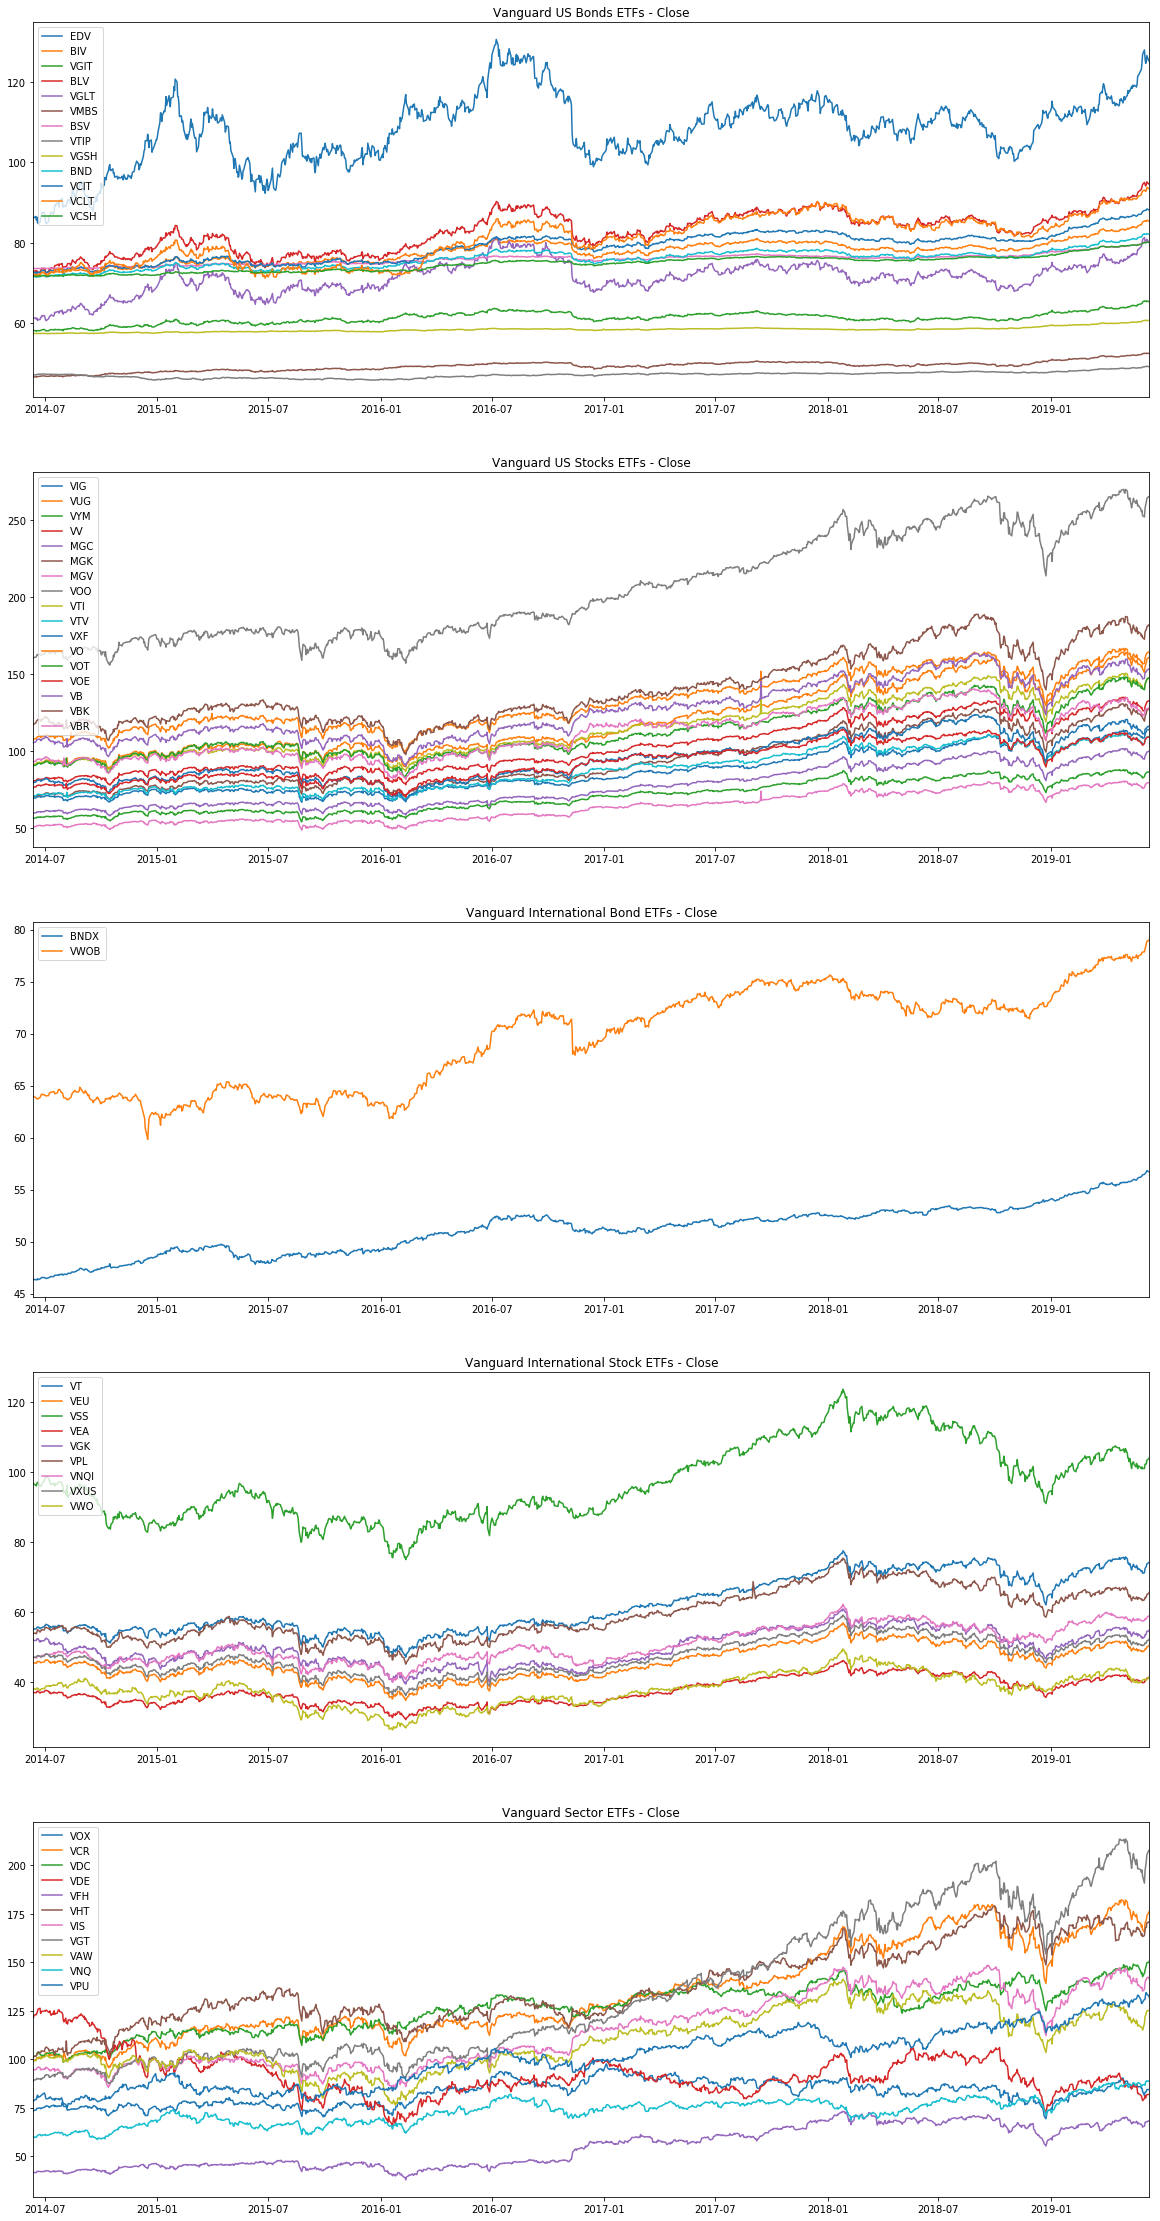

In [84]:
plt.figure(figsize=[20, 40])

# US Bonds
plt.subplot(5, 1, 1)
for i in etf_us_bonds_close.columns.tolist():
    plt.plot(etf_us_bonds_close[i])    
plt.title('Vanguard US Bonds ETFs - Close')
plt.legend(etf_us_bonds_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# US Stocks
plt.subplot(5, 1, 2)
for i in etf_us_stocks_close.columns.tolist():
    plt.plot(etf_us_stocks_close[i])    
plt.title('Vanguard US Stocks ETFs - Close')
plt.legend(etf_us_stocks_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Bonds
plt.subplot(5, 1, 3)
for i in etf_intl_bonds_close.columns.tolist():
    plt.plot(etf_intl_bonds_close[i])    
plt.title('Vanguard International Bond ETFs - Close')
plt.legend(etf_intl_bonds_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Stocks
plt.subplot(5, 1, 4)
for i in etf_intl_stocks_close.columns.tolist():
    plt.plot(etf_intl_stocks_close[i])    
plt.title('Vanguard International Stock ETFs - Close')
plt.legend(etf_intl_stocks_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Sectors
plt.subplot(5, 1, 5)
for i in etf_sectors_close.columns.tolist():
    plt.plot(etf_sectors_close[i])
plt.title('Vanguard Sector ETFs - Close')
plt.legend(etf_sectors_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

## Save The Data

Create a list of output files

In [85]:
output = ['etf_us_bonds.pickle', 
          'etf_us_stocks.pickle', 
          'etf_intl_bonds.pickle', 
          'etf_intl_stocks.pickle', 
          'etf_sectors.pickle']

Create a list of ETF data

In [86]:
data = [etf_us_bonds_close, 
        etf_us_stocks_close,
        etf_intl_bonds_close,
        etf_intl_stocks_close,
        etf_sectors_close]

Pickle

In [87]:
for i in range(len(output)):
    with open(output[i], 'wb') as f:
        pickle.dump(data[i], f)
    
    f.close()

## Conclusion
In this article, I showed how to scrape ETFs list from Vanguard web page, and pull historical OHLCV data from IEX.
I used Python packages Selenium and pandas-datareader for web scraping and sourcing datasets, respectively.
In the next article, I use the data to demonstrate the application of Kelly formula in investing.